## ICCLIM C4I Demo


Example notebook that runs ICCLIM, which is pre-installed in the notebook.

The example calculates the number of summer days (SU indicator) for the dataset chosen by the user on C4I


### Preparation of the needed modules

In [1]:
from icclim import icclim
import numpy as np
import netCDF4
import matplotlib.pyplot as plt
import matplotlib
import sys
import glob
import os
import datetime
import cftime

print("python: ",sys.version)
print("numpy: ", np.__version__)
print("netCDF4: ", netCDF4.__version__)
print("matplotlib: ", matplotlib.__version__)

python:  3.6.12 | packaged by conda-forge | (default, Dec  9 2020, 00:36:02) 
[GCC 9.3.0]
numpy:  1.19.5
netCDF4:  1.5.5.1
matplotlib:  3.3.3


### Specification of the parameters and period of interest

In [2]:
# studied period
dt1 = datetime.datetime(2015,1,1)
dt2 = datetime.datetime(2019,12,31)

out_f = 'su_icclim.nc'
filenames = glob.glob('./data/latest/tasmax_day*.nc')

icclim.indice(indice_name='SU', in_files=filenames, var_name='tasmax', slice_mode='JJA', time_range=[dt1, dt2], transfer_limit_Mbytes=200, out_file=out_f)

matplotlib.use('agg')

nc = netCDF4.Dataset(out_f)

time = nc.variables['time']
var = nc.variables['SU']

time = cftime.num2date(time[:], time.units, time.calendar)
year_list = np.array([t.year for t in time])

2021-01-11 13:10:50,258    ********************************************************************************************
2021-01-11 13:10:50,259    *                                                                                          *
2021-01-11 13:10:50,261    *          icclim                                                            V4.2.14       *
2021-01-11 13:10:50,262    *                                                                                          *
2021-01-11 13:10:50,263    *                                                                                          *
2021-01-11 13:10:50,263    *          Mon Jan 11 13:10:50 2021 GMT                                                    *
2021-01-11 13:10:50,265    *                                                                                          *
2021-01-11 13:10:50,266    *          BEGIN EXECUTION                                                                 *
2021-01-11 13:10:50,267    *            

### Calculate spatial average

In [3]:
var = np.reshape(var, (var.shape[0], -1))
result = np.mean(var, axis=1)

print(result)

[26.02153  25.663391 25.628197 25.975288 26.046402]


### Visualise the results

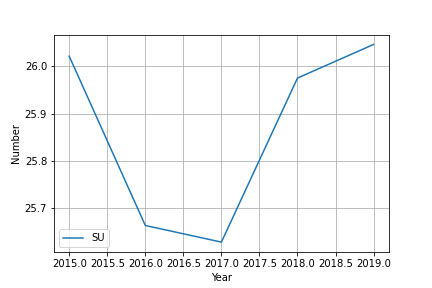

In [4]:

plt.figure()

plt.plot(year_list, result, label='SU')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Number')
plt.grid()

name_fig = "su_icclim.png"
plt.savefig("./"+name_fig)
from IPython.display import Image
Image(filename="./su_icclim.png") 